In [2]:
'''Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy'''

'Implementing Feedforward neural networks with Keras and TensorFlow\na. Import the necessary packages\nb. Load the training and testing data (MNIST/CIFAR10)\nc. Define the network architecture using Keras\nd. Train the model using SGD\ne. Evaluate the network\nf. Plot the training loss and accuracy'

In [3]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras#tensorflow and keras: These are used to create and train deep learning models.
                            #keras provides high-level neural network APIs in tensorflow.
import pandas as pd         #Pandas is a data manipulation and analysis library in Python, designed to handle structured data.
import numpy as np          #NumPy is the core library for numerical computations in Python, especially for dealing with large, multidimensional arrays and matrices.
import matplotlib.pyplot as plt #matplotlib.pyplot: This is used for visualizing data, like showing images or plotting accuracy and loss curves.
import random               #The random module provides functions for generating random numbers, which is useful in simulations, random sampling, and setting up experiments.
%matplotlib inline


In [5]:
#import dataset and split into train and test data
#MNIST (Modified National Institute of Standards and Technology) dataset is a set of 70,000 grayscale images, each representing a handwritten digit from 0 to 9.
#Each image in the dataset is 28x28 pixels, so each image has 784 pixels in total. Each pixel has a grayscale intensity value between 0 and 255, where 0 is black and 255 is white.
mnist = tf.keras.datasets.mnist           #mnist.load_data(): This function downloads the MNIST dataset (if it hasn’t been downloaded already) from a cloud storage location. Once downloaded, the dataset is cached locally for reuse.
(x_train, y_train), (x_test, y_test) = mnist.load_data()         #x_train and x_test: These are arrays containing the images. x_train has 60,000 images, while x_test has 10,000 images.
y_train and y_test: #These are arrays containing the labels for each image in x_train and x_test. 
                    #The label values range from 0 to 9, corresponding to the digit in each image.
                    #train : model learns to recognize patterns and features in the images associated with each digit.
                    #test:This helps ensure the model has generalized well and can accurately classify new images that it has not seen before.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# to see the length of training datasets
len(x_train)     # len of y_train is also same = 60000

60000

In [7]:
len(x_test)      # len of y_test is also same = 10000

10000

In [8]:
len(y_test)  #x_train and y_train should each contain 60,000 items (images and labels) because 60,000 images are used for training

10000

In [9]:
len(y_train) #x_test and y_test should each contain 10,000 items, as 10,000 images are reserved for testing the model.

60000

In [10]:
x_train.shape  # indicates there are 60,000 images, each with a 28x28 pixel grid.

(60000, 28, 28)

In [11]:
#we want to see first image

x_train[0]

#x_train[0] refers to the first image in the training dataset. 
#In Python, indexing starts at 0, so x_train[0] retrieves the image at the first position.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

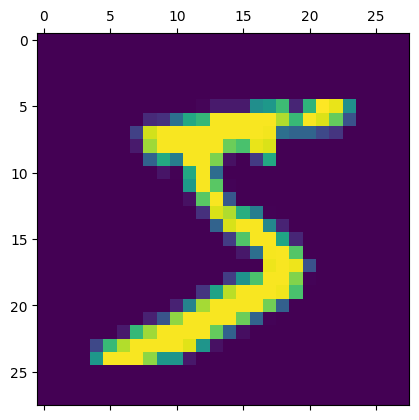

In [12]:
#to see how first image look
plt.matshow(x_train[0])

#plt.matshow(x_train[0]) is a command from the matplotlib library used to display an image as a matrix.

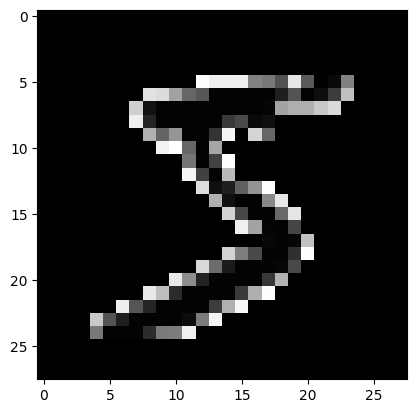

In [13]:
plt.imshow(-x_train[0], cmap="gray")
#shades of gray.

In [14]:
#normalize the images by scaling pixel intensities to the range 0,1
#Normalization is a technique for organizing data in a database.

x_train = x_train / 255
x_test = x_test / 255

#here 255 is maximum value of intensity that's why it is divided by 255

In [15]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train = x_train / 255
x_test = x_test / 255

In [16]:
x_train[0]


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [17]:
#--------------------Creating the model--------------------

In [18]:
#keras.Sequential: This function creates a linear stack of layers in Keras, where each layer has exactly one input tensor and one output tensor.
#The layers are added in sequence, one after another, from input to output.

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),    #Input layer  The neural network requires a 1D array for each input, 
                                               #so Flatten transforms each 2D image (28x28 pixels) into a 1D vector.
keras.layers.Dense(128, activation="relu"),    #hidden layer abs
                                               #This is a fully connected layer with 128 neurons
                                               #activation function that outputs 0 if the input is negative and outputs the input itself if it’s positive.
keras.layers.Dense(10, activation="softmax")   #output layer
])                                             #The softmax function transforms the output values into probabilities, where the sum of probabilities across all 10 neurons equals 1.
model.summary()
#The layer types and their output shapes.
#The number of parameters in each layer.
# Sigmoid has less accuracy thats why ReLU is used
# RelU-> Activation function.
#        Rectified Linear Unit
#        Return '0' if input is negative else linear if input is positive.
# softmax-> Activation function
#           chnges input value into values that reach from 0 to 1.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#------------------------ Compile the model--------------------------

In [20]:
model.compile(optimizer="sgd",   # Stochastic Gradient Descent  Controls how the model updates its weights to minimize errors.
loss="sparse_categorical_crossentropy",    # crossentropy reduces the loss Measures the difference between predicted and actual labels, suitable for multi-class classification with integer labels.
metrics=['accuracy'])  #Tracks the model’s performance in terms of correctly predicted labels during training.

In [21]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)
# epochs means duration/iteration shows loss and accuracy
# data is stored in history
#Trains the model for 10 epochs using the training dataset (x_train, y_train) and validates it on the test dataset (x_test, y_test).
#  Stores accuracy and loss metrics at each epoch

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1162 - loss: 2.3008 - val_accuracy: 0.1135 - val_loss: 2.2995
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1119 - loss: 2.2998 - val_accuracy: 0.1135 - val_loss: 2.2991
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1123 - loss: 2.2993 - val_accuracy: 0.1135 - val_loss: 2.2988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1119 - loss: 2.2991 - val_accuracy: 0.1135 - val_loss: 2.2984
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1145 - loss: 2.2983 - val_accuracy: 0.1135 - val_loss: 2.2980
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1134 - loss: 2.2980 - val_accuracy: 0.1135 - val_loss: 2.2976
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.1107 - loss: 2.2978 - val_accuracy: 0.1135 - val_loss: 2.2971
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1108 - loss: 2.2975 - 

In [22]:
# ---------------------------Evaluate Model-------------------------------

In [23]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
# this code evaluates the model's performance on the test data, outputs the loss, and prints the accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1160 - loss: 2.2958
Loss=2.295
Accuracy=0.113


In [24]:
# ---------------------- Making prediction on New Data----------------------------

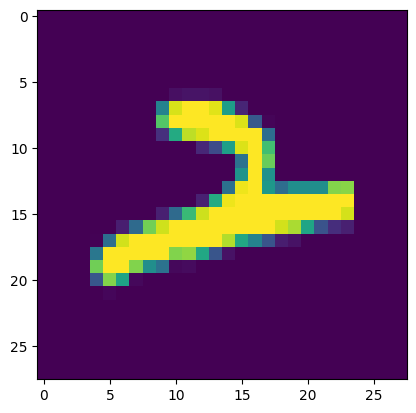

In [25]:
n=random.randint(0,9999) #This generates a random integer n between 0 and 9999 (inclusive). 
                          #The value of n is used as the index to randomly select a sample from the x_test dataset (which presumably contains 10,000 images, such as in the MNIST dataset).
plt.imshow(x_test[n])   #x_test[n] accesses the image at index n in the x_test dataset (which is a collection of test images).b show the image
plt.show()


In [26]:
#we use predict() on new data
predicted_value=model.predict(x_test)
print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Handwritten number in the image is= 1


In [27]:
# ----------------------Plot graph for Accuracy and Loss-----------------------

In [28]:
history.history??

In [29]:
history.history.keys()   #  as data is stored in histoty

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

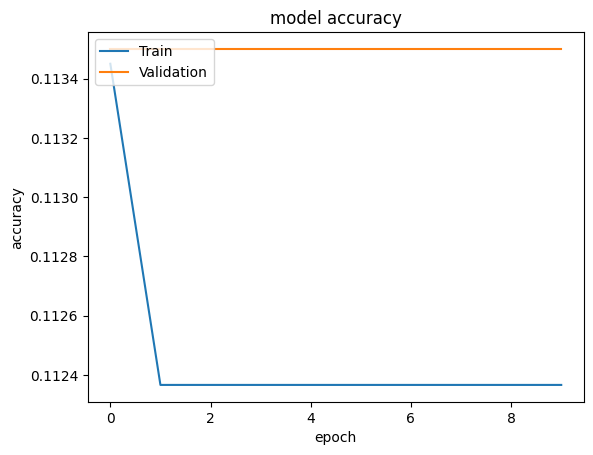

In [30]:
plt.plot(history.history['accuracy']) #history.history['accuracy'] is a list or array that contains the accuracy for the model on the training data after each epoch.
plt.plot()                             #takes this list and plots it on the graph.
plt.plot(history.history['val_accuracy']) #contains the accuracy values for the model on the validation data, which is evaluated at the end of each epoch during training.
plt.title('model accuracy')             #This adds a title to the plot, which in this case is "model accuracy."
plt.ylabel('accuracy')             #This labels the y-axis of the plot as "accuracy"
plt.xlabel('epoch')                 #This labels the x-axis as "epoch" to indicate that the x-axis represents the number of training epochs.
plt.legend(['Train', 'Validation'], loc='upper left') #loc='upper left' positions the legend in the upper-left corner of the plot.
plt.show()

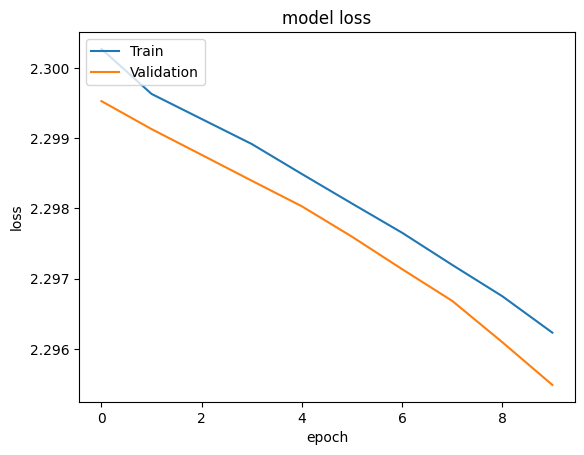

In [31]:
#same as above
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

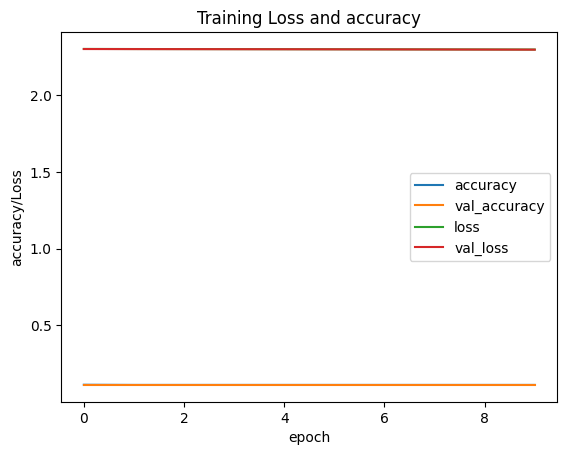

In [32]:
# Accuracy and loss on train data
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()